In [3]:
%matplotlib inline
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import sys
sys.path.insert(0, '../datasets/AgeDB')
sys.path.insert(0, '../datasets/LFR dataset')
sys.path.insert(0, '../datasets/Webface-OCC')
sys.path.insert(0, '../datasets/VMER')
from eval_agedb_util import *
from eval_lfr_util import *
from eval_webfaceocc_util import *
from eval_vmer_util import *

In [4]:
dic_final = {}

In [7]:
score_gap_5 = np.loadtxt("../datasets/AgeDB/results/scores_agedb_gap_5.csv", delimiter=",")
label_gap_5 = load_pair_list_label_agedb("../datasets/AgeDB/metadata/pairs_list_gap_5.txt")["label"].values
score_gap_10 = np.loadtxt("../datasets/AgeDB/results/scores_agedb_gap_10.csv", delimiter=",")
label_gap_10 = load_pair_list_label_agedb("../datasets/AgeDB/metadata/pairs_list_gap_10.txt")["label"].values
score_gap_20 = np.loadtxt("../datasets/AgeDB/results/scores_agedb_gap_20.csv", delimiter=",")
label_gap_20 = load_pair_list_label_agedb("../datasets/AgeDB/metadata/pairs_list_gap_20.txt")["label"].values
score_gap_30 = np.loadtxt("../datasets/AgeDB/results/scores_agedb_gap_30.csv", delimiter=",")
label_gap_30 = load_pair_list_label_agedb("../datasets/AgeDB/metadata/pairs_list_gap_30.txt")["label"].values

Text(0.5, 1.0, 'ROC on AgeDB')

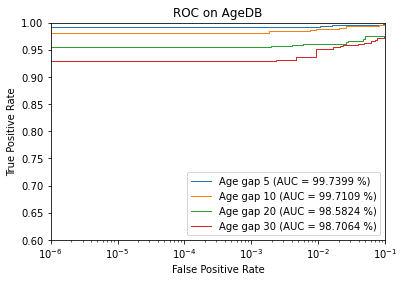

In [8]:
dic_agedb = {}
target = "AgeDB"
fig = plt.figure()

fpr, tpr, _ = roc_curve(label_gap_5, score_gap_5)
roc_auc = auc(fpr, tpr)
fpr = np.flipud(fpr)
tpr = np.flipud(tpr)  # select largest tpr at same fpr
dic_gap_5 = {}
dic_gap_5["fpr"] = fpr.tolist()
dic_gap_5["tpr"] = tpr.tolist()
dic_gap_5["auc"] = roc_auc.tolist()
dic_agedb["gap_5"] = dic_gap_5
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Age gap 5 (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_gap_10, score_gap_10)
roc_auc = auc(fpr, tpr)
dic_gap_10 = {}
dic_gap_10["fpr"] = fpr.tolist()
dic_gap_10["tpr"] = tpr.tolist()
dic_gap_10["auc"] = roc_auc.tolist()
dic_agedb["gap_10"] = dic_gap_10
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Age gap 10 (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_gap_20, score_gap_20)
roc_auc = auc(fpr, tpr)
dic_gap_20 = {}
dic_gap_20["fpr"] = fpr.tolist()
dic_gap_20["tpr"] = tpr.tolist()
dic_gap_20["auc"] = roc_auc.tolist()
dic_agedb["gap_20"] = dic_gap_20
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Age gap 20 (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_gap_30, score_gap_30)
roc_auc = auc(fpr, tpr)
dic_gap_30 = {}
dic_gap_30["fpr"] = fpr.tolist()
dic_gap_30["tpr"] = tpr.tolist()
dic_gap_30["auc"] = roc_auc.tolist()
dic_agedb["gap_30"] = dic_gap_30
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Age gap 30 (AUC = %0.4f %%)' %
                (roc_auc * 100)))

dic_final["agedb"] = dic_agedb

plt.xlim([10 ** -6, 0.1])
plt.ylim([0.6, 1])
plt.xscale('log')
plt.legend(loc="upper left")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC on {}'.format(target))

In [5]:
dic_webface = {}
score_original = np.loadtxt("Webface-OCC/scores_original.csv", delimiter=",")
label_original = eval_template.load_pair_list_label_agedb("Webface-OCC/original_pairs_list.txt")["label"].values
score_glasses = np.loadtxt("Webface-OCC/scores_glasses.csv", delimiter=",")
label_glasses = eval_template.load_pair_list_label_agedb("Webface-OCC/glass_masked_pairs_list.txt")["label"].values
score_surgical = np.loadtxt("Webface-OCC/scores_surgical_mask.csv", delimiter=",")
label_surgical = eval_template.load_pair_list_label_agedb("Webface-OCC/surgical_masked_pairs_list.txt")["label"].values


target = "Webface-OCC"
fig = plt.figure()

fpr, tpr, _ = roc_curve(label_original, score_original)
roc_auc = auc(fpr, tpr)
fpr = np.flipud(fpr)
tpr = np.flipud(tpr)  # select largest tpr at same fpr
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_webface["without_occ"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Without occlusion (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_glasses, score_glasses)
roc_auc = auc(fpr, tpr)
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_webface["glasses"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Glasses occlusion (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_surgical, score_surgical)
roc_auc = auc(fpr, tpr)
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_webface["surgical_mask"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Surgical mask occlusion (AUC = %0.4f %%)' %
                (roc_auc * 100)))

dic_final["webface"] = dic_webface

plt.xlim([10 ** -6, 0.1])
plt.ylim([0.4, 1])
plt.xscale('log')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on {}'.format(target))

Text(0.5, 1.0, 'ROC on Webface-OCC')

In [6]:
dic_lfr = {}
score_front = np.loadtxt("LFR dataset/scores_front_front.csv", delimiter=",")
label_front = eval_template.load_pair_list_label_lfr("LFR dataset/lfr_front_pairs_list.txt")["label"].values
score_left = np.loadtxt("LFR dataset/scores_front_left.csv", delimiter=",")
label_left = eval_template.load_pair_list_label_lfr("LFR dataset/lfr_front_left_pairs_list.txt")["label"].values
score_right = np.loadtxt("LFR dataset/scores_front_right.csv", delimiter=",")
label_right = eval_template.load_pair_list_label_lfr("LFR dataset/lfr_front_right_pairs_list.txt")["label"].values


target = "LFR"
fig = plt.figure()

fpr, tpr, _ = roc_curve(label_front, score_front)
roc_auc = auc(fpr, tpr)
fpr = np.flipud(fpr)
tpr = np.flipud(tpr)  # select largest tpr at same fpr
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_lfr["front"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Front-Front (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_left, score_left)
roc_auc = auc(fpr, tpr)
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_lfr["right"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Front-Right (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_right, score_right)
roc_auc = auc(fpr, tpr)
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_lfr["left"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Front-Left (AUC = %0.4f %%)' %
                (roc_auc * 100)))

dic_final["lfr"] = dic_lfr

plt.xlim([10 ** -6, 0.1])
plt.ylim([0.0, 1])
plt.xscale('log')
plt.legend(loc="upper left")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on {}'.format(target))

Text(0.5, 1.0, 'ROC on LFR')

In [7]:
dic_rfw = {}
score_caucasian = np.loadtxt("RFW/scores_rfw_Caucasian.csv", delimiter=",")
label_caucasian = eval_template.load_pair_list_label_rfw("RFW", "Caucasian")["label"].values
score_african = np.loadtxt("RFW/scores_rfw_African.csv", delimiter=",")
label_african = eval_template.load_pair_list_label_rfw("RFW", "African")["label"].values
score_indian = np.loadtxt("RFW/scores_rfw_Indian.csv", delimiter=",")
label_indian = eval_template.load_pair_list_label_rfw("RFW", "Indian")["label"].values
score_asian = np.loadtxt("RFW/scores_rfw_Asian.csv", delimiter=",")
label_asian = eval_template.load_pair_list_label_rfw("RFW", "Asian")["label"].values


target = "RFW"
fig = plt.figure()

fpr, tpr, _ = roc_curve(label_caucasian, score_caucasian)
roc_auc = auc(fpr, tpr)
fpr = np.flipud(fpr)
tpr = np.flipud(tpr)  # select largest tpr at same fpr
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_rfw["caucasian"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Caucasian (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_african, score_african)
roc_auc = auc(fpr, tpr)
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_rfw["african"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('African (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_indian, score_indian)
roc_auc = auc(fpr, tpr)
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_rfw["indian"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Indian (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_asian, score_asian)
roc_auc = auc(fpr, tpr)
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_rfw["asian"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Asian (AUC = %0.4f %%)' %
                (roc_auc * 100)))

dic_final["rfw"] = dic_rfw

plt.xlim([10 ** -6, 0.1])
plt.ylim([0.8, 1])
plt.xscale('log')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on {}'.format(target))

Text(0.5, 1.0, 'ROC on RFW')

In [8]:
dic_vmer = {}
score_caucasian = np.loadtxt("vggface2_test/scores_vmer_caucasian.csv", delimiter=",")
label_caucasian = eval_template.load_pair_list_label_vmer("vggface2_test/caucasian_pair_list3.txt")["label"].values
score_african = np.loadtxt("vggface2_test/scores_vmer_african.csv", delimiter=",")
label_african = eval_template.load_pair_list_label_vmer("vggface2_test/african_pair_list4.txt")["label"].values
score_indian = np.loadtxt("vggface2_test/scores_vmer_indian.csv", delimiter=",")
label_indian = eval_template.load_pair_list_label_vmer("vggface2_test/indian_pair_list4.txt")["label"].values
score_asian = np.loadtxt("vggface2_test/scores_vmer_asian.csv", delimiter=",")
label_asian = eval_template.load_pair_list_label_vmer("vggface2_test/asian_pair_list4.txt")["label"].values


target = "VMER"
fig = plt.figure()

fpr, tpr, _ = roc_curve(label_caucasian, score_caucasian)
roc_auc = auc(fpr, tpr)
fpr = np.flipud(fpr)
tpr = np.flipud(tpr)  # select largest tpr at same fpr
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_vmer["caucasian"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Caucasian (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_african, score_african)
roc_auc = auc(fpr, tpr)
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_vmer["african"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('African (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_indian, score_indian)
roc_auc = auc(fpr, tpr)
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_vmer["indian"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Indian (AUC = %0.4f %%)' %
                (roc_auc * 100)))

fpr, tpr, _ = roc_curve(label_asian, score_asian)
roc_auc = auc(fpr, tpr)
dic = {}
dic["fpr"] = fpr.tolist()
dic["tpr"] = tpr.tolist()
dic["auc"] = roc_auc.tolist()
dic_vmer["asian"] = dic
plt.plot(fpr,
            tpr,
            lw=1,
            label=('Asian (AUC = %0.4f %%)' %
                (roc_auc * 100)))

dic_final["vmer"] = dic_vmer

plt.xlim([10 ** -6, 0.1])
plt.ylim([0.4, 1])
plt.xscale('log')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on {}'.format(target))

Text(0.5, 1.0, 'ROC on VMER')

In [9]:
np.save("all_fpr_tpr_auc.npy", dic_final)

In [ ]:
a = np.load("all_fpr_tpr_auc.npy", allow_pickle='True').item()

In [ ]:
a["rfw"].keys()